<a href="https://colab.research.google.com/github/AniRony/CIFAR100_with_KERAS/blob/main/CIFAR100_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras # keras is a backend language. both dev by Google. Pytorch developed by Facebook.
from keras.models import load_model

from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
(X_tr, y_tr), (X_te, y_te) = keras.datasets.cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 14s 0us/step


In [3]:
print((X_tr.shape, y_tr.shape), (X_te.shape, y_te.shape))

((50000, 32, 32, 3), (50000, 1)) ((10000, 32, 32, 3), (10000, 1))


In [40]:
labels = {0: ['fruit and vegetables','apple'],
1:  ['fish','aquarium_fish'],
2:  ['people','baby'],
3:  ['large carnivores','bear'],
4:  ['aquatic mammals','beaver'],
5:  ['household furniture','bed'],
6:  ['insects','bee'],
7:  ['insects','beetle'],
8:  ['vehicles 1','bicycle'],
9:  ['food containers','bottle'],
10: ['food containers','bowl'],
11: ['people','boy'],
12: ['large man-made outdoor things','bridge'],
13: ['vehicles 1','bus'],
14: ['insects','butterfly'],
15: ['large omnivores and herbivores','camel'],
16: ['food containers','can'],
17: ['large man-made outdoor things','castle'],
18: ['insects','caterpillar'],
19: ['large omnivores and herbivores','cattle'],
20: ['household furniture','chair'],
21: ['large omnivores and herbivores','chimpanzee'],
22: ['household electrical devices','clock'],
23: ['large natural outdoor scenes','cloud'],
24: ['insects','cockroach'],
25: ['household furniture','couch'],
26: ['non-insect invertebrates','crab'],
27: ['reptiles','crocodile'],
28: ['food containers','cup'],
29: ['reptiles','dinosaur'],
30: ['aquatic mammals','dolphin'],
31: ['large omnivores and herbivores','elephant'],
32: ['fish','flatfish'],
33: ['large natural outdoor scenes','forest'],
34: ['medium-sized mammals','fox'],
35: ['people','girl'],
36: ['small mammals','hamster'],
37: ['large man-made outdoor things','house'],
38: ['large omnivores and herbivores','kangaroo'],
39: ['household electrical devices','computer keyboard'],
40: ['household electrical devices','lamp'],
41: ['vehicles 2','lawn_mower'],
42: ['large carnivores','leopard'],
43: ['large carnivores','lion'],
44: ['reptiles','lizard'],
45: ['non-insect invertebrates','lobster'],
46: ['people','man'],
47: ['trees','maple_tree'],
48: ['vehicles 1','motorcycle'],
49: ['large natural outdoor scenes','mountain'],
50: ['small mammals','mouse'],
51: ['fruit and vegetables','mushroom'],
52: ['trees','oak_tree'],
53: ['fruit and vegetables','orange'],
54: ['flowers','orchid'],
55: ['aquatic mammals','otter'],
56: ['trees','palm_tree'],
57: ['fruit and vegetables','pear'],
58: ['vehicles 1','pickup_truck'],
59: ['trees','pine_tree'],
60: ['large natural outdoor scenes','plain'],
61: ['food containers','plate'],
62: ['flowers','poppies'],
63: ['medium-sized mammals','porcupine'],
64: ['medium-sized mammals','possum'],
65: ['small mammals','rabbit'],
66: ['medium-sized mammals','raccoon'],
67: ['fish','ray'],
68: ['large man-made outdoor things','road'],
69: ['vehicles 2','rocket'],
70: ['flowers','roses'],
71: ['large natural outdoor scenes','sea'],
72: ['aquatic mammals','seal'],
73: ['fish','shark'],
74: ['small mammals','shrew'],
75: ['medium-sized mammals','skunk'],
76: ['large man-made outdoor things','skyscraper'],
77: ['non-insect invertebrates','snail'],
78: ['reptiles','snake'],
79: ['non-insect invertebrates','spider'],
80: ['small mammals','squirrel'],
81: ['vehicles 2','streetcar'],
82: ['flowers','sunflowers'],
83: ['fruit and vegetables','sweet_pepper'],
84: ['household furniture','table'],
85: ['vehicles 2','tank'],
86: ['household electrical devices','telephone'],
87: ['household electrical devices','television'],
88: ['large carnivores','tiger'],
89: ['vehicles 2','tractor'],
90: ['vehicles 1','train'],
91: ['fish','trout'],
92: ['flowers','tulips'],
93: ['reptiles','turtle'],
94: ['household furniture','wardrobe'],
95: ['aquatic mammals','whale'],
96: ['trees','willow_tree'],
97: ['large carnivores','wolf'],
98: ['people','woman'],
99: ['non-insect invertebrates','worm']}
print(f'Super Class = {labels[10][0]}')
print(f'Class = {labels[10][1]}')

Super Class = food containers
Class = bowl


coarse_label =
0: aquatic_mammals
1: fish
2: flowers
3: food_containers
4: fruit_and_vegetables
5: household_electrical_devices
6: household_furniture
7: insects
8: large_carnivores
9: large_man-made_outdoor_things
10: large_natural_outdoor_scenes
11: large_omnivores_and_herbivores
12: medium_mammals
13: non-insect_invertebrates
14: people
15: reptiles
16: small_mammals
17: trees
18: vehicles_1
19: vehicles_2


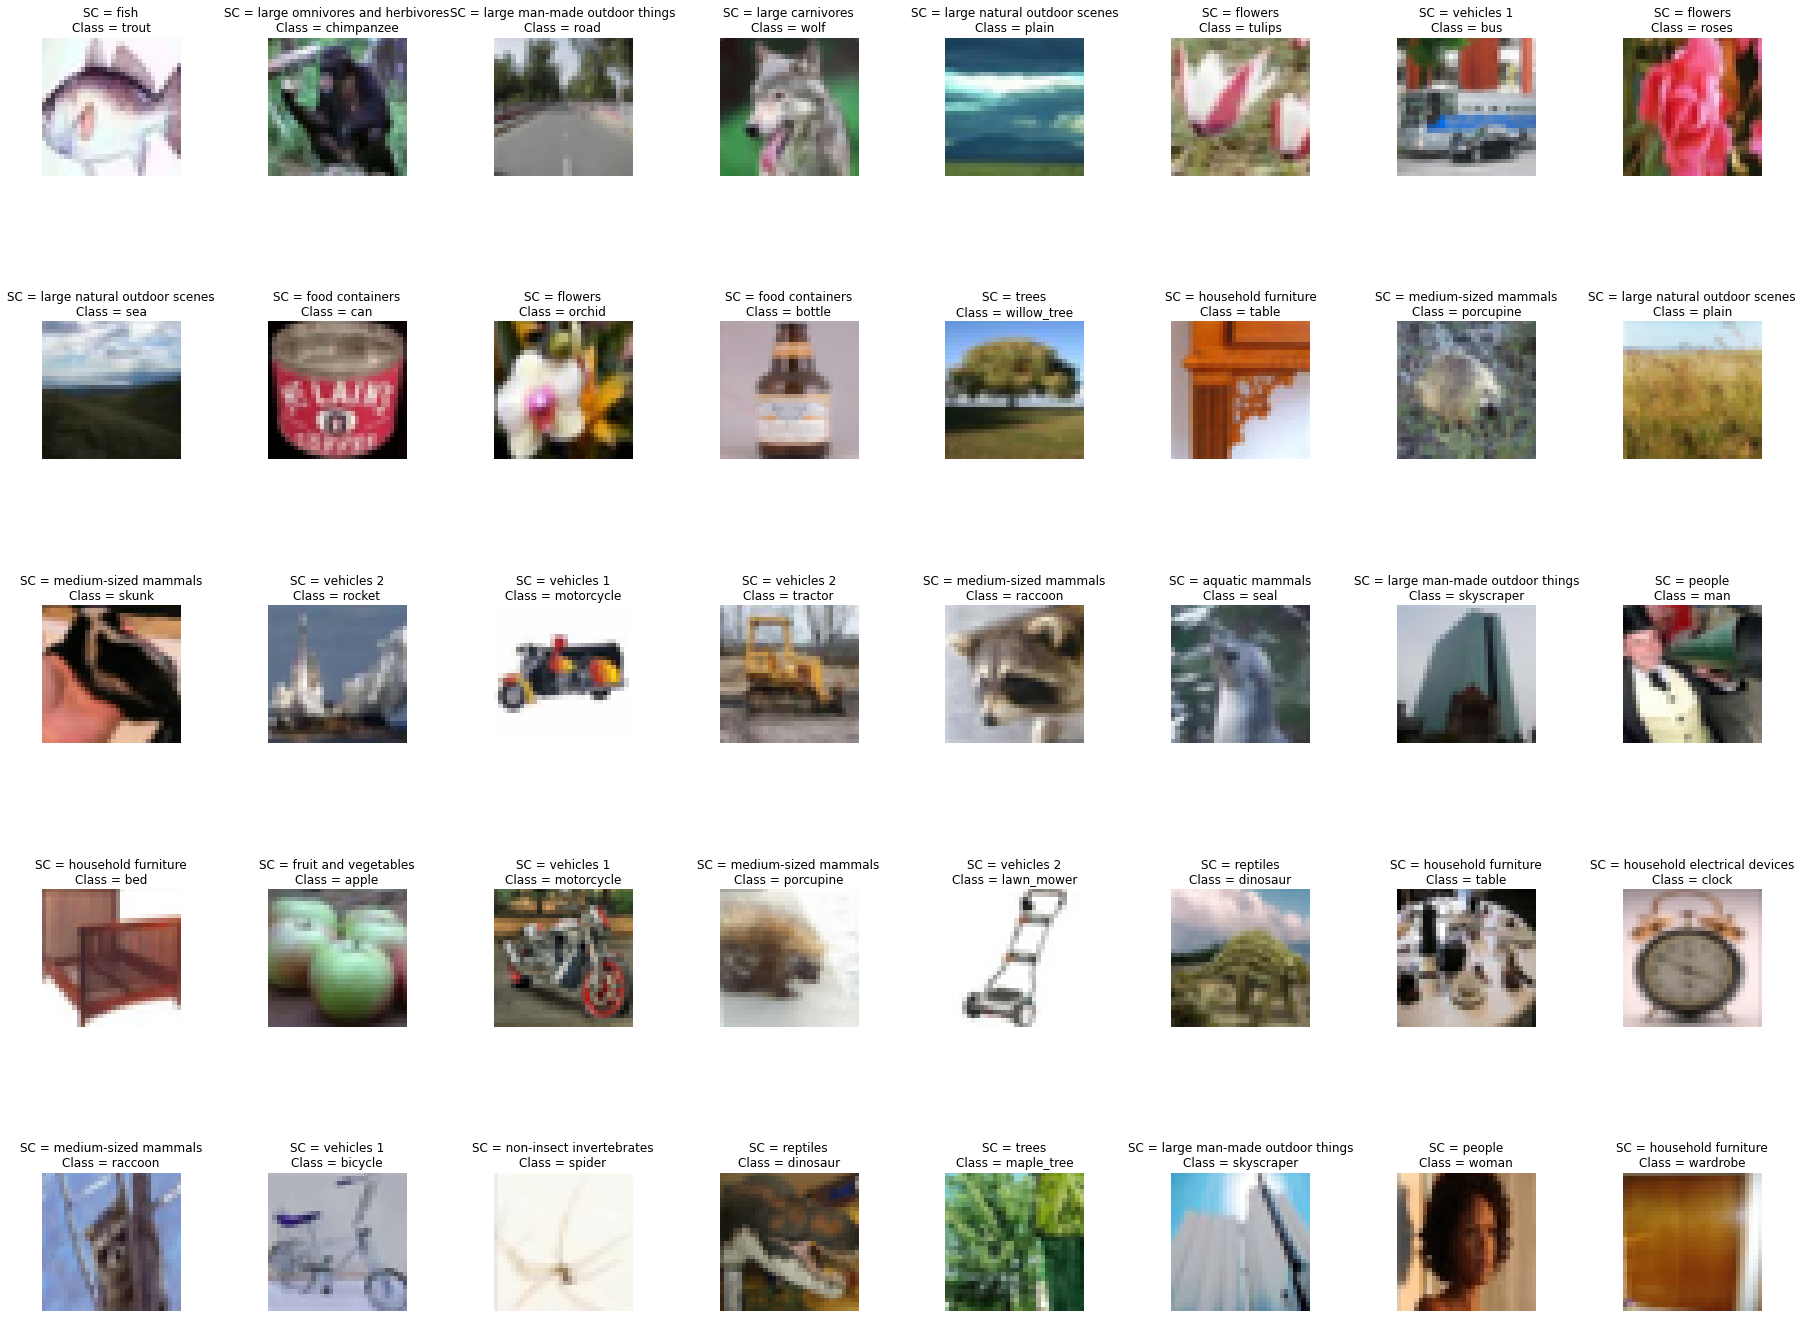

In [43]:
plt.figure(figsize=(25,20))
import random
for i in range(40):
    n = random.randint(0,49999)
    plt.subplot(5,8,i+1)
    plt.imshow(X_tr[n])
    plt.axis('off')
    plt.title(f'SC = {labels[y_tr[n][0]][0]}\nClass = {labels[y_tr[n][0]][1]}')
plt.tight_layout(h_pad=2.0)
plt.show()

In [6]:
# Reduce pixel values
x_train, x_test = X_tr / 255.0, X_te / 255.0
 
# flatten the label values
y_train, y_test = y_tr.flatten(), y_te.flatten()

In [7]:
# number of classes
num_class = len(set(y_train))
print("number of classes:", num_class)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(num_class, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 100
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 27s 9ms/step - loss: 3.5397 - accuracy: 0.1788 - val_loss: 3.0572 - val_accuracy: 0.2458
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.6652 - accuracy: 0.3210 - val_loss: 2.4558 - val_accuracy: 0.3635
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2945 - accuracy: 0.3960 - val_loss: 2.3690 - val_accuracy: 0.3878
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0177 - accuracy: 0.4572 - val_loss: 2.1558 - val_accuracy: 0.4373
Epoch 5/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7806 - accuracy: 0.5085 - val_loss: 1.9416 - val_accuracy: 0.4807
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5704 - accuracy: 0.5583 - val_loss: 1.8560 - val_accuracy: 0.5044
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3609 - accuracy: 0.6093 - val_loss: 1.9036 - val_ac

In [10]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.6857 - accuracy: 0.5626 - val_loss: 1.7655 - val_accuracy: 0.5354
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.4414 - accuracy: 0.6092 - val_loss: 1.7547 - val_accuracy: 0.5467
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.3647 - accuracy: 0.6287 - val_loss: 1.6051 - val_accuracy: 0.5696
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.3074 - accuracy: 0.6391 - val_loss: 1.7545 - val_accuracy: 0.5586
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2410 - accuracy: 0.6546 - val_loss: 1.5778 - val_accuracy: 0.5812
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.2153 - accuracy: 0.6601 - val_loss: 1.6429 - val_accuracy: 0.5626
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.1701 - accuracy: 0.6686 - val_loss: 1.5701 -

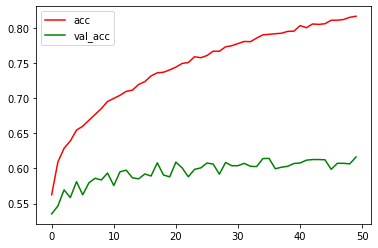

In [11]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [13]:
model.save('/content/drive/MyDrive/DEEP LEARNING/CIFAR_KERAS/CIFAR100_original.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/DEEP LEARNING/CIFAR_KERASCIFAR100_original.h5')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


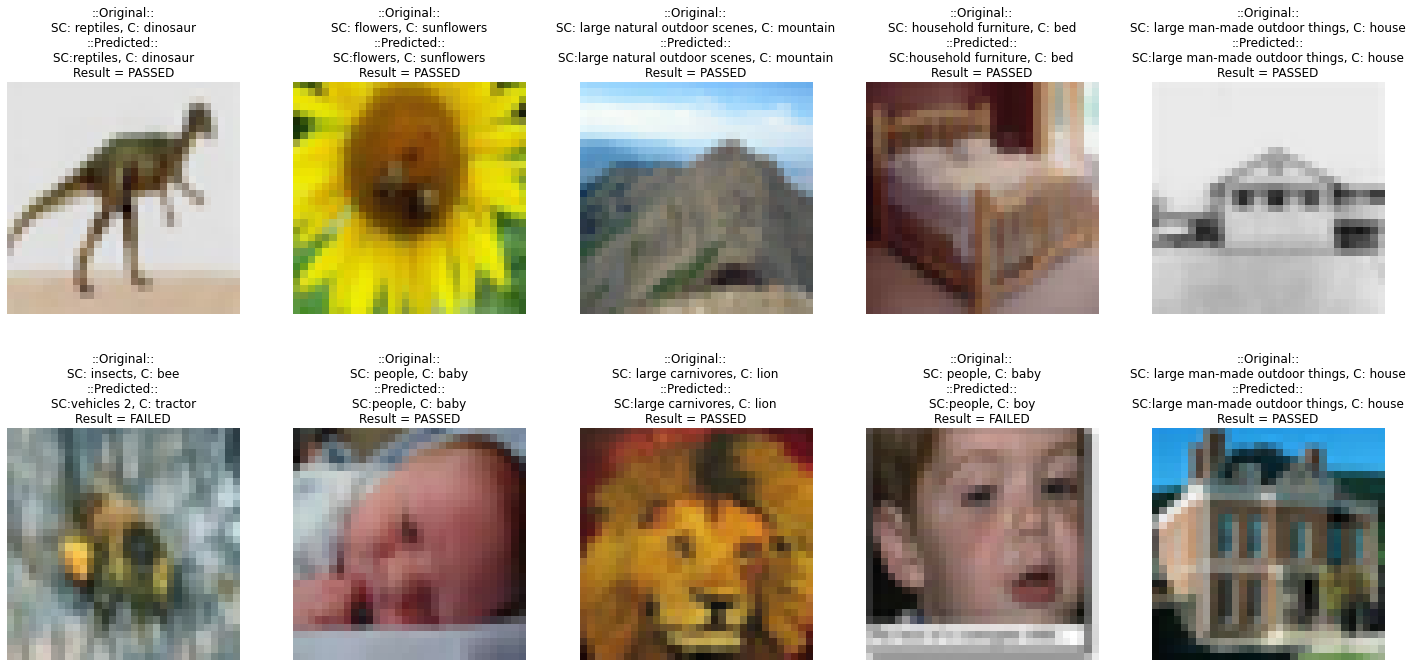

In [47]:
import random
plt.figure(figsize=(20,10))
for i in range(10):
  num = random.randint(0,10001)
  plt.subplot(2,5,i+1)
  img_array = np.array(x_test[num])
  pred = img_array.reshape(1, 32, 32, 3)
  predicted_label = labels[model.predict(pred).argmax()]
  original_label = labels[y_test[num]]
  res = "PASSED" if original_label[1].lower() == predicted_label[1].lower() else "FAILED"
  plt.title(f"::Original::\nSC: {original_label[0]}, C: {original_label[1]}\n::Predicted::\nSC:{predicted_label[0]}, C: {predicted_label[1]}\nResult = {res}")
  plt.imshow(img_array)
  plt.axis("off")
plt.tight_layout(h_pad=2.0)
plt.show()